In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import special

In [64]:
 def show_shape(patch):
    ax=plt.gca()
    ax.add_patch(patch)
    plt.axis()


## Slope Field

In [25]:
sizeSl = 2
stepSl = 1
radiusSl = stepSl / 4

In [76]:
def slopeField(foo, fooSet=None, additionalF=None, circles=None):
    plt.axvline(x=0)
    plt.axhline(y=0)
    for t in np.arange(- sizeSl, sizeSl + radiusSl, stepSl):
        for x in np.arange(- sizeSl, sizeSl + radiusSl, stepSl):
            curGrad = foo(t, x)
            if curGrad != None:
                if abs(curGrad) < 1:
                    plt.plot([t - radiusSl, t + radiusSl], [x - radiusSl  * curGrad, x + radiusSl * curGrad],  color = 'orange')
                else:
                    plt.plot([t - radiusSl * 1 / curGrad, t + radiusSl * 1 / curGrad], [x - radiusSl, x + radiusSl],  color = 'orange')
    if fooSet != None:
        for foo1 in fooSet:
            newRange = np.arange(- sizeSl, sizeSl + radiusSl, 0.01)
            plt.plot(newRange, foo1(newRange))
    if additionalF != None:
        intersect = np.arange(-sizeSl, sizeSl, 0.001)
        plt.plot(intersect, additionalF(intersect), color="navy")
    if circles != None:
        for i in circles:
            for j in circles:
                c = plt.Circle((i, j), radius= 0.1)
                show_shape(c)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

## Integral Curve

In [106]:
sizeInt = 4
stepInt = 0.003
radiusInt = stepInt / 3

In [107]:
def integralCurve(foo, t1, t2, requiredRange, stepInt):
    colors = ["maroon", "darkcyan", "forestgreen", "crimson", "orchid"]
    axes = plt.gca()
    axes.set_ylim([-10, 10])
    step = -1
    for startPoint in requiredRange:
        step += 1
        x = startPoint
        for t in np.arange(t1, t2, stepInt):
            curGrad = foo(t, x)
            plt.plot([t, t + stepInt], [x, x + stepInt * curGrad],  color = colors[step])
            if abs(curGrad) > 1000.0:
                break
            x = x + stepInt * curGrad
    
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.show()

## Vector Field

In [111]:
sizeVec = 3
stepVec = 0.2

In [114]:
def vectorField(foo, markVertHor=None):
    axes = plt.gca()
    axes.set_xlim([-2.5, 2.5]) 
    axes.set_ylim([-3, 3])
    for x in np.arange(-sizeVec, sizeVec, stepVec):
        for y in np.arange(-sizeVec, sizeVec, stepSl):
            curVec = foo(x, y)
            if markVertHor and (curVec[0] == 0 or curVec[1] == 0):
                axes.arrow(x, y, x + curVec[0], y + curVec[1], head_width=0.15, head_length=0.3, fc='b', ec='y')
            else:
                axes.arrow(x, y, x + curVec[0], y + curVec[1], head_width=0.15, head_length=0.3, fc='r', ec='k')
            #plt.plot([x, x + curVec[0]], [y, y + curVec[1]], color = 'darkgreen')
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.show()

## Phase Path

In [62]:
sizePhase = 4
stepPhase = 0.4

In [63]:
def phasePath(foo):
    axes = plt.gca()
    axes.set_xlim([-0.1, 4]) 
    axes.set_ylim([-7, 7])
    interval = np.arange(0, sizePhase, 0.01)

    for constant in np.arange(-20 * stepPhase, 20 * stepPhase, stepPhase):
        plt.plot(interval, foo(interval) * constant, color = 'orange')

    plt.axvline(x=0)
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.show()

## Function

In [222]:
def graph1(foo1):
    interval = np.arange(-10, 10, 0.01)
    plt.plot(interval, foo1(interval), color = 'orange', label='H(x, y_0)')
    
    plt.legend()
    plt.show()

In [218]:
def graph2(foo1, foo2):
    axes = plt.gca()
    axes.set_ylim([-7, 7])
    interval = np.arange(-5, 5, 0.01)
    plt.plot(interval, foo1(interval), color = 'orange', label='H(x, y_0)')
    plt.plot(interval, foo2(interval), color = 'lightgreen', label='H(x_0, y)')
    
    plt.legend()
    plt.show()

### Task 1

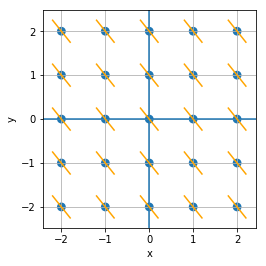

In [87]:
def foo(x, y):
    k = -5/4
    return k
slopeField(foo, circles=range(-2, 3))

/home/pavlk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


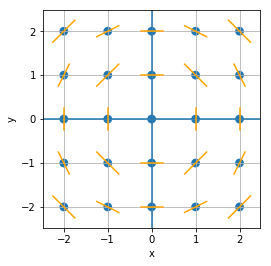

In [93]:
def foo(x, y):
    if y == 0 and x == 0:
        return None
    k = -x/y
    return k
slopeField(foo, circles=range(-2, 3))

/home/pavlk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


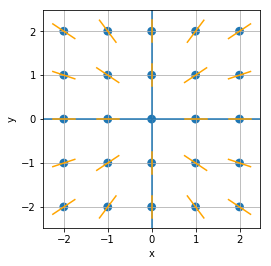

In [92]:
def foo(x, y):
    if x == 0 and y == 0:
        return None
    k = 2 * y / x / 3
    return k
slopeField(foo, circles=range(-2, 3))

/home/pavlk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


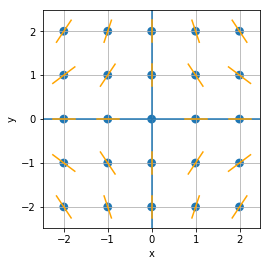

In [94]:
def foo(x, y):
    if x == 0 and y == 0:
        return None
    k = -3 * y / x / 2
    return k
slopeField(foo, circles=range(-2, 3))

### Task 2

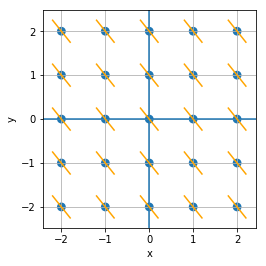

In [83]:
def foo(x, y):
    k = -5/4
    return k
slopeField(foo, circles=range(-2, 3))

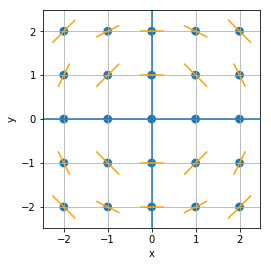

In [84]:
def foo(x, y):
    if y == 0:
        return None
    k = -x/y
    return k
slopeField(foo, circles=range(-2, 3))

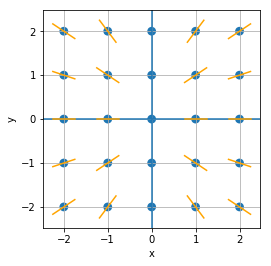

In [85]:
def foo(x, y):
    if x == 0:
        return None
    k = 2 * y / x / 3
    return k
slopeField(foo, circles=range(-2, 3))

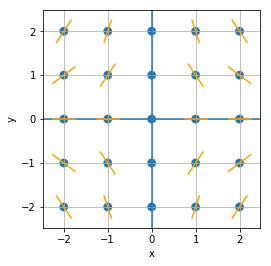

In [86]:
def foo(x, y):
    if x == 0:
        return None
    k = -3 * y / x / 2
    return k
slopeField(foo, circles=range(-2, 3))

### Task 3

#### b

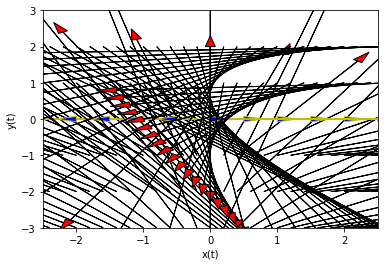

In [115]:
def foo(x, y): 
    return 0.5 * x - 3 * x * y, -4 * y + 1 * x * y
vectorField(foo, markVertHor=True)

#### h

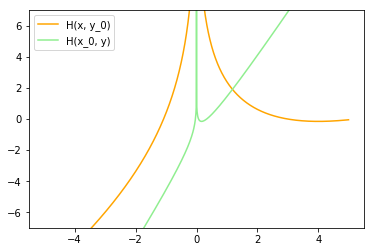

In [131]:
def F(x):
    return x - 4 * np.log(abs(x))
def G(y):
    return 3 * y - 0.5 * np.log(abs(y))
def foo1(x):
    return F(x) + G(0.1666666666666666666)
def foo2(y):
    return F(4) + G(y)
graph2(foo1, foo2)

#### i

In [70]:
sizePhase = 10
stepPhase = 0.3
def phasePathLambert(foo):
    axes = plt.gca()
    axes.set_xlim([0, 10]) 
    axes.set_ylim([-1, 5])
    interval = np.arange(-sizePhase, sizePhase, 0.01)

    for constant in np.arange(0, 10 * stepPhase, stepPhase):
        xrange = arange(0, 10, delta)
        yrange = arange(-0.2, 5, delta)
        X, Y = meshgrid(xrange, yrange)
        plt.contour(X, Y, X - 4 * np.log(abs(X)) + 3 * Y - 0.5 * np.log(abs(Y)) - constant, [0])
    #plt.plot(interval, 1/6 * special.lambertw(-6 * np.exp(2 * interval + constant) / interval ** 8), color = 'orange')

    #plt.axvline(x=0)
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    c=plt.Circle((4, 1/6), radius= 0.1)
    show_shape(c)
    plt.grid(True)

    plt.show()

/home/pavlk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


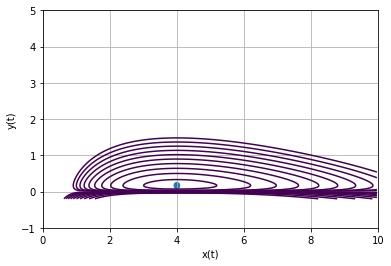

In [71]:
phasePathLambert(None)

### blue circle is  permament solution

# Task 5

In [57]:
G = 6.67408 * 10**(-11) # C-system of metrics.
r = 6371
deltaT = 1

## Теоретические выкладки:
На каждой итерации считаем ускорение, затем скорость, затем координату

### Координаты для набора планет и спутника

In [41]:
def trip(CurVx, CurVy, CurX, CurY, mPlanet, mSatel, planets, time, nPlanets):
    curX = CurX
    curY = CurY
    curVx = CurVx
    curVy = CurVy
    iters = time // deltaT
    resX = []
    resY = []
    for i in range(int(iters)):
        powX = 0
        powY = 0
        Pow = 0
        for j in range(nPlanets):
            sqDist = (curX - planets[j][0]) ** 2 + (curY - planets[j][1]) ** 2
            Pow += G * mPlanet * mSatel / sqDist
            signX = 1
            if curX - planets[j][0] > 0:
                signX = -1
            signY = 1
            if curY - planets[j][0] > 0:
                signY = -1
            powX += signX * Pow * (curX - planets[j][0]) ** 2 / sqDist
            powY += signY * Pow * (curY - planets[j][1]) ** 2 / sqDist
            #print(powX, powY, sqDist)
            #print(curVx, curVy, curX, curY)
        #print()
        curVx += powX / mSatel
        curVy += powY / mSatel
        curX += deltaT * curVx
        curY += deltaT * curVy
        resX.append(curX)
        resY.append(curY)

    return resX, resY

In [295]:
print("Enter satelite coords:")
xSatel, ySatel = list(map(float, input().split()))

print("Enter satelite mass:")
mSatel = float(input())

print("Enter planets mass (equal for each one):")
mPlanet = float(input())

print("Enter planets number")
nPlanets = int(input())
planets = [[0, 0] for i in range(nPlanets)]
for i in range(nPlanets):
    print("Enter %d th plante's coords" % (i + 1))
    planets[i] = list(map(float, input().split()))

_curX = xSatel
_curY = ySatel

print("Required time:")
time = int(input())
_curVx = 0
_curVy = 0

res = trip(_curVx, _curVy, _curX, _curY, mPlanet, mSatel, planets, time, nPlanets)
print("Destination point:", res)

Enter satelite coords:
10000


ValueError: not enough values to unpack (expected 2, got 1)

#### a

In [42]:
xSatel, ySatel = r, 0

mSatel = 10
mPlanet = 9.81 / G * r * r
nPlanets = 1

planets = [[0, 0] for i in range(nPlanets)]

_curX = xSatel
_curY = ySatel

print("Required time:")
time = int(input())
_curVx = 0
_curVy = 9

resX, resY = trip(_curVx, _curVy, _curX, _curY, mPlanet, mSatel, planets, time, nPlanets)
resX = np.asarray(resX)
resY = np.asarray(resY)

Required time:
1000


In [43]:
print(resY, resX)

[ 9.00000000e-04  1.80000000e-03  2.70000000e-03 ... -2.79637329e+07
 -2.79637357e+07 -2.79637385e+07] [ 6.37099902e+03  6.37099706e+03  6.37099411e+03 ... -1.70374391e+09
 -1.70374408e+09 -1.70374425e+09]


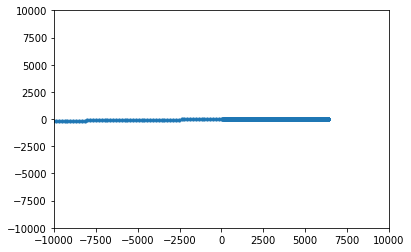

In [44]:
axes = plt.gca()
axes.set_xlim([-10000, 10000])
axes.set_ylim([-10000, 10000])
plt.scatter(resX, resY, s=10)
#print(i)
plt.show()

Как мы видим, при маленькой скорости, около центра Земли у нас не хватает точности, объект пролетает его слишком быстро и улетает далеко-далеко. При большой скорости он улетает сразу.

#### b

In [65]:
def tripTest(CurVx, CurVy, CurX, CurY, mPlanet, mSatel, planets, time, nPlanets):
    curX = CurX
    curY = CurY
    curVx = CurVx
    curVy = CurVy
    iters = time // deltaT
    sqDistOld = 0
    for i in range(int(iters)):
        powX = 0
        powY = 0
        Pow = 0
        for j in range(nPlanets):
            sqDist = (curX - planets[j][0]) ** 2 + (curY - planets[j][1]) ** 2
            if sqDistOld > sqDist:
                print("NO!")
                return
            sqDistOld = sqDist
            Pow += G * mPlanet * mSatel / sqDist
            signX = 1
            if curX - planets[j][0] > 0:
                signX = -1
            signY = 1
            if curY - planets[j][0] > 0:
                signY = -1
            powX += signX * Pow * (curX - planets[j][0]) ** 2 / sqDist
            powY += signY * Pow * (curY - planets[j][1]) ** 2 / sqDist
            #print(powX, powY, sqDist)
            #print(curVx, curVy, curX, curY)
        #print()
        curVx += powX / mSatel
        curVy += powY / mSatel
        curX += deltaT * curVx
        curY += deltaT * curVy
    print("YES!")
    return 

In [66]:
xSatel, ySatel = r, 0

mSatel = 10
mPlanet = 9.81 / G * r * r
nPlanets = 1

planets = [[0, 0] for i in range(nPlanets)]

_curX = xSatel
_curY = ySatel

print("Required time:")
time = int(input())
_curVx = 0

for _curVy in range(5, 10000):
    print("Does satelite with speed of %d km/s fly away?" % _curVy)
    tripTest(_curVx, _curVy, _curX, _curY, mPlanet, mSatel, planets, time, nPlanets)


Required time:
100
Does satelite with speed of 5 km/s fly away?
NO!
Does satelite with speed of 6 km/s fly away?
NO!
Does satelite with speed of 7 km/s fly away?
NO!
Does satelite with speed of 8 km/s fly away?
NO!
Does satelite with speed of 9 km/s fly away?
NO!
Does satelite with speed of 10 km/s fly away?
NO!
Does satelite with speed of 11 km/s fly away?
NO!
Does satelite with speed of 12 km/s fly away?
NO!
Does satelite with speed of 13 km/s fly away?
NO!
Does satelite with speed of 14 km/s fly away?
NO!
Does satelite with speed of 15 km/s fly away?
NO!
Does satelite with speed of 16 km/s fly away?
NO!
Does satelite with speed of 17 km/s fly away?
NO!
Does satelite with speed of 18 km/s fly away?
NO!
Does satelite with speed of 19 km/s fly away?
NO!
Does satelite with speed of 20 km/s fly away?
NO!
Does satelite with speed of 21 km/s fly away?
NO!
Does satelite with speed of 22 km/s fly away?
NO!
Does satelite with speed of 23 km/s fly away?
NO!
Does satelite with speed of 24 km/s 

Does satelite with speed of 897 km/s fly away?
YES!
Does satelite with speed of 898 km/s fly away?
YES!
Does satelite with speed of 899 km/s fly away?
YES!
Does satelite with speed of 900 km/s fly away?
YES!
Does satelite with speed of 901 km/s fly away?
YES!
Does satelite with speed of 902 km/s fly away?
YES!
Does satelite with speed of 903 km/s fly away?
YES!
Does satelite with speed of 904 km/s fly away?
YES!
Does satelite with speed of 905 km/s fly away?
YES!
Does satelite with speed of 906 km/s fly away?
YES!
Does satelite with speed of 907 km/s fly away?
YES!
Does satelite with speed of 908 km/s fly away?
YES!
Does satelite with speed of 909 km/s fly away?
YES!
Does satelite with speed of 910 km/s fly away?
YES!
Does satelite with speed of 911 km/s fly away?
YES!
Does satelite with speed of 912 km/s fly away?
YES!
Does satelite with speed of 913 km/s fly away?
YES!
Does satelite with speed of 914 km/s fly away?
YES!
Does satelite with speed of 915 km/s fly away?
YES!
Does satelit

YES!
Does satelite with speed of 1782 km/s fly away?
YES!
Does satelite with speed of 1783 km/s fly away?
YES!
Does satelite with speed of 1784 km/s fly away?
YES!
Does satelite with speed of 1785 km/s fly away?
YES!
Does satelite with speed of 1786 km/s fly away?
YES!
Does satelite with speed of 1787 km/s fly away?
YES!
Does satelite with speed of 1788 km/s fly away?
YES!
Does satelite with speed of 1789 km/s fly away?
YES!
Does satelite with speed of 1790 km/s fly away?
YES!
Does satelite with speed of 1791 km/s fly away?
YES!
Does satelite with speed of 1792 km/s fly away?
YES!
Does satelite with speed of 1793 km/s fly away?
YES!
Does satelite with speed of 1794 km/s fly away?
YES!
Does satelite with speed of 1795 km/s fly away?
YES!
Does satelite with speed of 1796 km/s fly away?
YES!
Does satelite with speed of 1797 km/s fly away?
YES!
Does satelite with speed of 1798 km/s fly away?
YES!
Does satelite with speed of 1799 km/s fly away?
YES!
Does satelite with speed of 1800 km/s fly

YES!
Does satelite with speed of 2526 km/s fly away?
YES!
Does satelite with speed of 2527 km/s fly away?
YES!
Does satelite with speed of 2528 km/s fly away?
YES!
Does satelite with speed of 2529 km/s fly away?
YES!
Does satelite with speed of 2530 km/s fly away?
YES!
Does satelite with speed of 2531 km/s fly away?
YES!
Does satelite with speed of 2532 km/s fly away?
YES!
Does satelite with speed of 2533 km/s fly away?
YES!
Does satelite with speed of 2534 km/s fly away?
YES!
Does satelite with speed of 2535 km/s fly away?
YES!
Does satelite with speed of 2536 km/s fly away?
YES!
Does satelite with speed of 2537 km/s fly away?
YES!
Does satelite with speed of 2538 km/s fly away?
YES!
Does satelite with speed of 2539 km/s fly away?
YES!
Does satelite with speed of 2540 km/s fly away?
YES!
Does satelite with speed of 2541 km/s fly away?
YES!
Does satelite with speed of 2542 km/s fly away?
YES!
Does satelite with speed of 2543 km/s fly away?
YES!
Does satelite with speed of 2544 km/s fly

Does satelite with speed of 3317 km/s fly away?
YES!
Does satelite with speed of 3318 km/s fly away?
YES!
Does satelite with speed of 3319 km/s fly away?
YES!
Does satelite with speed of 3320 km/s fly away?
YES!
Does satelite with speed of 3321 km/s fly away?
YES!
Does satelite with speed of 3322 km/s fly away?
YES!
Does satelite with speed of 3323 km/s fly away?
YES!
Does satelite with speed of 3324 km/s fly away?
YES!
Does satelite with speed of 3325 km/s fly away?
YES!
Does satelite with speed of 3326 km/s fly away?
YES!
Does satelite with speed of 3327 km/s fly away?
YES!
Does satelite with speed of 3328 km/s fly away?
YES!
Does satelite with speed of 3329 km/s fly away?
YES!
Does satelite with speed of 3330 km/s fly away?
YES!
Does satelite with speed of 3331 km/s fly away?
YES!
Does satelite with speed of 3332 km/s fly away?
YES!
Does satelite with speed of 3333 km/s fly away?
YES!
Does satelite with speed of 3334 km/s fly away?
YES!
Does satelite with speed of 3335 km/s fly away

Does satelite with speed of 4149 km/s fly away?
YES!
Does satelite with speed of 4150 km/s fly away?
YES!
Does satelite with speed of 4151 km/s fly away?
YES!
Does satelite with speed of 4152 km/s fly away?
YES!
Does satelite with speed of 4153 km/s fly away?
YES!
Does satelite with speed of 4154 km/s fly away?
YES!
Does satelite with speed of 4155 km/s fly away?
YES!
Does satelite with speed of 4156 km/s fly away?
YES!
Does satelite with speed of 4157 km/s fly away?
YES!
Does satelite with speed of 4158 km/s fly away?
YES!
Does satelite with speed of 4159 km/s fly away?
YES!
Does satelite with speed of 4160 km/s fly away?
YES!
Does satelite with speed of 4161 km/s fly away?
YES!
Does satelite with speed of 4162 km/s fly away?
YES!
Does satelite with speed of 4163 km/s fly away?
YES!
Does satelite with speed of 4164 km/s fly away?
YES!
Does satelite with speed of 4165 km/s fly away?
YES!
Does satelite with speed of 4166 km/s fly away?
YES!
Does satelite with speed of 4167 km/s fly away

YES!
Does satelite with speed of 4820 km/s fly away?
YES!
Does satelite with speed of 4821 km/s fly away?
YES!
Does satelite with speed of 4822 km/s fly away?
YES!
Does satelite with speed of 4823 km/s fly away?
YES!
Does satelite with speed of 4824 km/s fly away?
YES!
Does satelite with speed of 4825 km/s fly away?
YES!
Does satelite with speed of 4826 km/s fly away?
YES!
Does satelite with speed of 4827 km/s fly away?
YES!
Does satelite with speed of 4828 km/s fly away?
YES!
Does satelite with speed of 4829 km/s fly away?
YES!
Does satelite with speed of 4830 km/s fly away?
YES!
Does satelite with speed of 4831 km/s fly away?
YES!
Does satelite with speed of 4832 km/s fly away?
YES!
Does satelite with speed of 4833 km/s fly away?
YES!
Does satelite with speed of 4834 km/s fly away?
YES!
Does satelite with speed of 4835 km/s fly away?
YES!
Does satelite with speed of 4836 km/s fly away?
YES!
Does satelite with speed of 4837 km/s fly away?
YES!
Does satelite with speed of 4838 km/s fly

YES!
Does satelite with speed of 5621 km/s fly away?
YES!
Does satelite with speed of 5622 km/s fly away?
YES!
Does satelite with speed of 5623 km/s fly away?
YES!
Does satelite with speed of 5624 km/s fly away?
YES!
Does satelite with speed of 5625 km/s fly away?
YES!
Does satelite with speed of 5626 km/s fly away?
YES!
Does satelite with speed of 5627 km/s fly away?
YES!
Does satelite with speed of 5628 km/s fly away?
YES!
Does satelite with speed of 5629 km/s fly away?
YES!
Does satelite with speed of 5630 km/s fly away?
YES!
Does satelite with speed of 5631 km/s fly away?
YES!
Does satelite with speed of 5632 km/s fly away?
YES!
Does satelite with speed of 5633 km/s fly away?
YES!
Does satelite with speed of 5634 km/s fly away?
YES!
Does satelite with speed of 5635 km/s fly away?
YES!
Does satelite with speed of 5636 km/s fly away?
YES!
Does satelite with speed of 5637 km/s fly away?
YES!
Does satelite with speed of 5638 km/s fly away?
YES!
Does satelite with speed of 5639 km/s fly

YES!
Does satelite with speed of 6381 km/s fly away?
YES!
Does satelite with speed of 6382 km/s fly away?
YES!
Does satelite with speed of 6383 km/s fly away?
YES!
Does satelite with speed of 6384 km/s fly away?
YES!
Does satelite with speed of 6385 km/s fly away?
YES!
Does satelite with speed of 6386 km/s fly away?
YES!
Does satelite with speed of 6387 km/s fly away?
YES!
Does satelite with speed of 6388 km/s fly away?
YES!
Does satelite with speed of 6389 km/s fly away?
YES!
Does satelite with speed of 6390 km/s fly away?
YES!
Does satelite with speed of 6391 km/s fly away?
YES!
Does satelite with speed of 6392 km/s fly away?
YES!
Does satelite with speed of 6393 km/s fly away?
YES!
Does satelite with speed of 6394 km/s fly away?
YES!
Does satelite with speed of 6395 km/s fly away?
YES!
Does satelite with speed of 6396 km/s fly away?
YES!
Does satelite with speed of 6397 km/s fly away?
YES!
Does satelite with speed of 6398 km/s fly away?
YES!
Does satelite with speed of 6399 km/s fly

Does satelite with speed of 7156 km/s fly away?
YES!
Does satelite with speed of 7157 km/s fly away?
YES!
Does satelite with speed of 7158 km/s fly away?
YES!
Does satelite with speed of 7159 km/s fly away?
YES!
Does satelite with speed of 7160 km/s fly away?
YES!
Does satelite with speed of 7161 km/s fly away?
YES!
Does satelite with speed of 7162 km/s fly away?
YES!
Does satelite with speed of 7163 km/s fly away?
YES!
Does satelite with speed of 7164 km/s fly away?
YES!
Does satelite with speed of 7165 km/s fly away?
YES!
Does satelite with speed of 7166 km/s fly away?
YES!
Does satelite with speed of 7167 km/s fly away?
YES!
Does satelite with speed of 7168 km/s fly away?
YES!
Does satelite with speed of 7169 km/s fly away?
YES!
Does satelite with speed of 7170 km/s fly away?
YES!
Does satelite with speed of 7171 km/s fly away?
YES!
Does satelite with speed of 7172 km/s fly away?
YES!
Does satelite with speed of 7173 km/s fly away?
YES!
Does satelite with speed of 7174 km/s fly away

YES!
Does satelite with speed of 7971 km/s fly away?
YES!
Does satelite with speed of 7972 km/s fly away?
YES!
Does satelite with speed of 7973 km/s fly away?
YES!
Does satelite with speed of 7974 km/s fly away?
YES!
Does satelite with speed of 7975 km/s fly away?
YES!
Does satelite with speed of 7976 km/s fly away?
YES!
Does satelite with speed of 7977 km/s fly away?
YES!
Does satelite with speed of 7978 km/s fly away?
YES!
Does satelite with speed of 7979 km/s fly away?
YES!
Does satelite with speed of 7980 km/s fly away?
YES!
Does satelite with speed of 7981 km/s fly away?
YES!
Does satelite with speed of 7982 km/s fly away?
YES!
Does satelite with speed of 7983 km/s fly away?
YES!
Does satelite with speed of 7984 km/s fly away?
YES!
Does satelite with speed of 7985 km/s fly away?
YES!
Does satelite with speed of 7986 km/s fly away?
YES!
Does satelite with speed of 7987 km/s fly away?
YES!
Does satelite with speed of 7988 km/s fly away?
YES!
Does satelite with speed of 7989 km/s fly

Does satelite with speed of 8785 km/s fly away?
YES!
Does satelite with speed of 8786 km/s fly away?
YES!
Does satelite with speed of 8787 km/s fly away?
YES!
Does satelite with speed of 8788 km/s fly away?
YES!
Does satelite with speed of 8789 km/s fly away?
YES!
Does satelite with speed of 8790 km/s fly away?
YES!
Does satelite with speed of 8791 km/s fly away?
YES!
Does satelite with speed of 8792 km/s fly away?
YES!
Does satelite with speed of 8793 km/s fly away?
YES!
Does satelite with speed of 8794 km/s fly away?
YES!
Does satelite with speed of 8795 km/s fly away?
YES!
Does satelite with speed of 8796 km/s fly away?
YES!
Does satelite with speed of 8797 km/s fly away?
YES!
Does satelite with speed of 8798 km/s fly away?
YES!
Does satelite with speed of 8799 km/s fly away?
YES!
Does satelite with speed of 8800 km/s fly away?
YES!
Does satelite with speed of 8801 km/s fly away?
YES!
Does satelite with speed of 8802 km/s fly away?
YES!
Does satelite with speed of 8803 km/s fly away

Does satelite with speed of 9651 km/s fly away?
YES!
Does satelite with speed of 9652 km/s fly away?
YES!
Does satelite with speed of 9653 km/s fly away?
YES!
Does satelite with speed of 9654 km/s fly away?
YES!
Does satelite with speed of 9655 km/s fly away?
YES!
Does satelite with speed of 9656 km/s fly away?
YES!
Does satelite with speed of 9657 km/s fly away?
YES!
Does satelite with speed of 9658 km/s fly away?
YES!
Does satelite with speed of 9659 km/s fly away?
YES!
Does satelite with speed of 9660 km/s fly away?
YES!
Does satelite with speed of 9661 km/s fly away?
YES!
Does satelite with speed of 9662 km/s fly away?
YES!
Does satelite with speed of 9663 km/s fly away?
YES!
Does satelite with speed of 9664 km/s fly away?
YES!
Does satelite with speed of 9665 km/s fly away?
YES!
Does satelite with speed of 9666 km/s fly away?
YES!
Does satelite with speed of 9667 km/s fly away?
YES!
Does satelite with speed of 9668 km/s fly away?
YES!
Does satelite with speed of 9669 km/s fly away

# 353 km/s
That's not close to real, you know. Sad, but I'm sure it's accuracy problem.

# Task 6

#### a

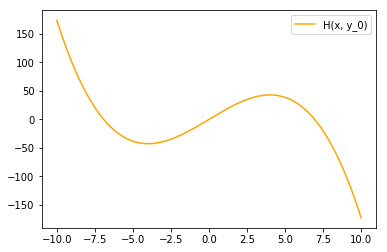

In [223]:
def foo(x):
    return -x * x * x / 3 + 16 * x
graph1(foo)